<a href="https://colab.research.google.com/github/caramos84/Quantum/blob/main/HipergraphDensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Hipergrafos de Wolfram
# Carlos Ramos + ChatGPT 4o
# 19/03/2025

!pip install networkx
!pip install matplotlib
!pip install svgwrite
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.cluster import hierarchy
from scipy.spatial import distance

In [25]:
def create_hc(G):
    """Creates hierarchical cluster of graph G from distance matrix"""
    path_length = dict(nx.all_pairs_shortest_path_length(G))
    distances = np.zeros((len(G), len(G)))

    for u, p in path_length.items():
        for v, d in p.items():
            distances[u, v] = d

    # Hierarchical clustering
    Y = distance.squareform(distances)
    Z = hierarchy.complete(Y)
    membership = hierarchy.fcluster(Z, t=1.15)

    # Partition nodes
    partition = defaultdict(list)
    for n, p in enumerate(membership):
        partition[p].append(n)

    return list(partition.values())

def apply_rhizomatic_growth(G, iterations=20):
    """Applies a rhizomatic growth model to expand the graph in a non-radial manner."""
    for _ in range(iterations):
        new_edges = []
        existing_nodes = list(G.nodes)
        for node in existing_nodes:
            if np.random.rand() < 0.5:  # Randomly decide whether to grow from this node
                w = max(G.nodes) + 2  # New node label
                connected_node = np.random.choice(existing_nodes)  # Connect to a random existing node
                new_edges.append((node, w))
                new_edges.append((connected_node, w))
        G.add_edges_from(new_edges)
    return G

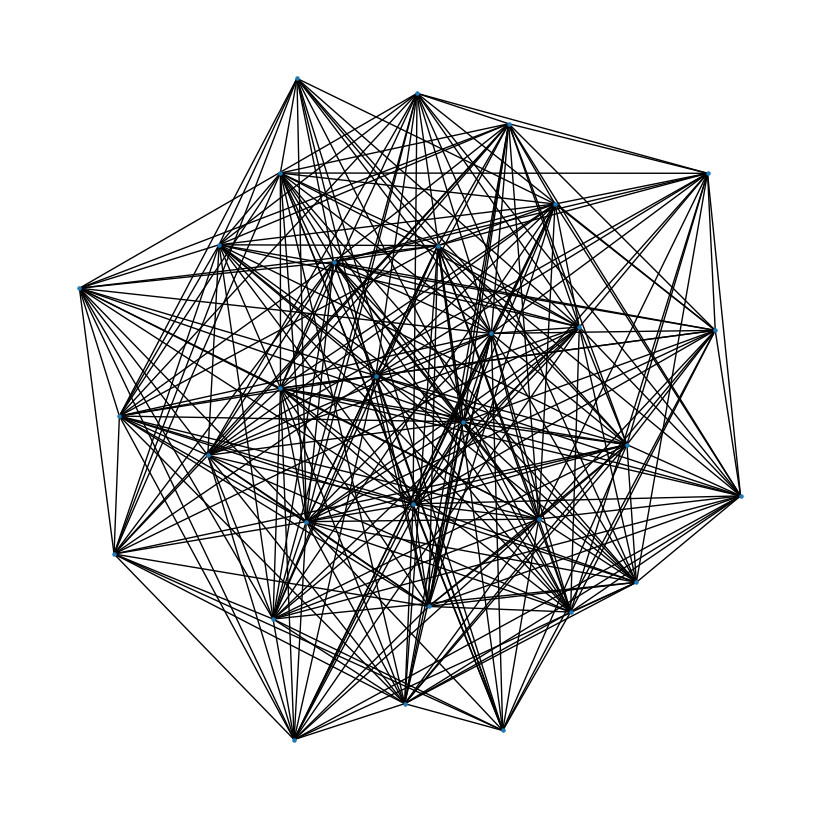

In [30]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G = apply_rhizomatic_growth(G, iterations=30)

# Draw graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=5)
plt.axis("off")
plt.show()